In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from libs.TrafficGenerator import DatasetConvertor 
from libs.TrafficPredictor.ContextAssisted import PreparingDataset as PreparingDatasetCA
from libs.TrafficPredictor.ContextAssisted import trainModelByDefaultSetting as trainModelCA
from libs.TrafficPredictor.ContextAssisted import evaluateModel as evaluateModelCA
from libs.TrafficPredictor.ContextAssisted import createModel as createModelCA
from libs.TrafficPredictor.ContextFree import PreparingDataset as PreparingDatasetCF
from libs.TrafficPredictor.ContextFree import trainModelByDefaultSetting as trainModelCF
from libs.TrafficPredictor.ContextFree import evaluateModel as evaluateModelCF
from libs.TrafficPredictor.ContextFree import createModel as createModelCF

In [2]:
rawDatasetFolder = "Dataset"
datasetConverter = DatasetConvertor(rawDatasetFolder)
datasetConverter.processDataset(dbParameter=0.01, alpha=0.01, mode="fixed", direction="forward")
#datasetConverter.processDataset(dbParameter=0.05, alpha=0.01, mode="fixed", direction="backward")

========== thumb ============
Forward: Compression rate:0.22314470485360394
========== index ============
Forward: Compression rate:0.24555334544091786
========== middle ============
Forward: Compression rate:0.24907031047306064


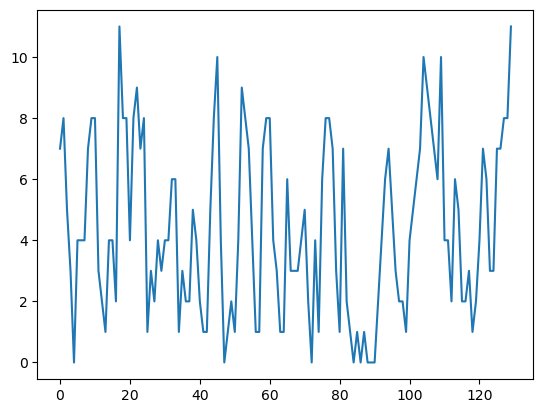

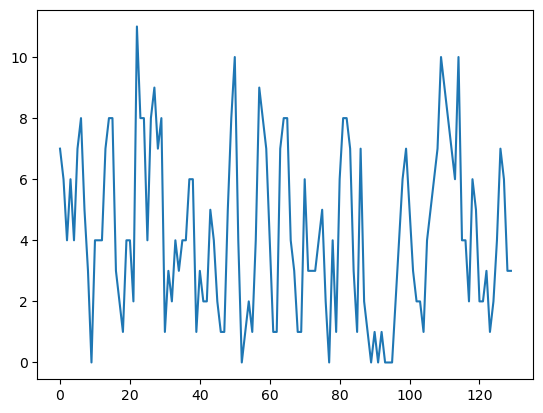

In [6]:
thumbDataUnit = datasetConverter.getDataUnit("thumb_fr")
lenWindow = 20
paramsCA = {}
paramsCA['lenSource'] = 20
paramsCA['lenTarget'] = lenWindow
paramsCA['trainRatio'] = 0.6
paramsCA['dataAugment'] = False
paramsCA['smoothFc'] = 3.0
paramsCA['smoothOrder'] = 3
trainDataCA, testDataCA = PreparingDatasetCA(thumbDataUnit, paramsCA, verbose=False)
(_,_,_,trafficCA,_,_,_,_) = testDataCA 

paramsCF = {}
paramsCF['lenWindow'] = lenWindow
paramsCF['lenSource'] = 15
paramsCF['lenTarget'] = 1
paramsCF['trainRatio'] = 0.6
paramsCF['dataAugment'] = False
trainDataCF, testDataCF = PreparingDatasetCF(thumbDataUnit, paramsCF, verbose=False)
(_, trafficCF) = testDataCF

plt.plot(trafficCA.flatten()[paramsCF['lenWindow']:150])
plt.show()
plt.plot(trafficCF.flatten()[:150-paramsCF['lenWindow']])
plt.show()